# Regresión lineal multivariable

## Importando los datos y librerias necesarias

In [1]:
import pandas as pd
df = pd.read_csv("../data/housing.data", header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos

Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.

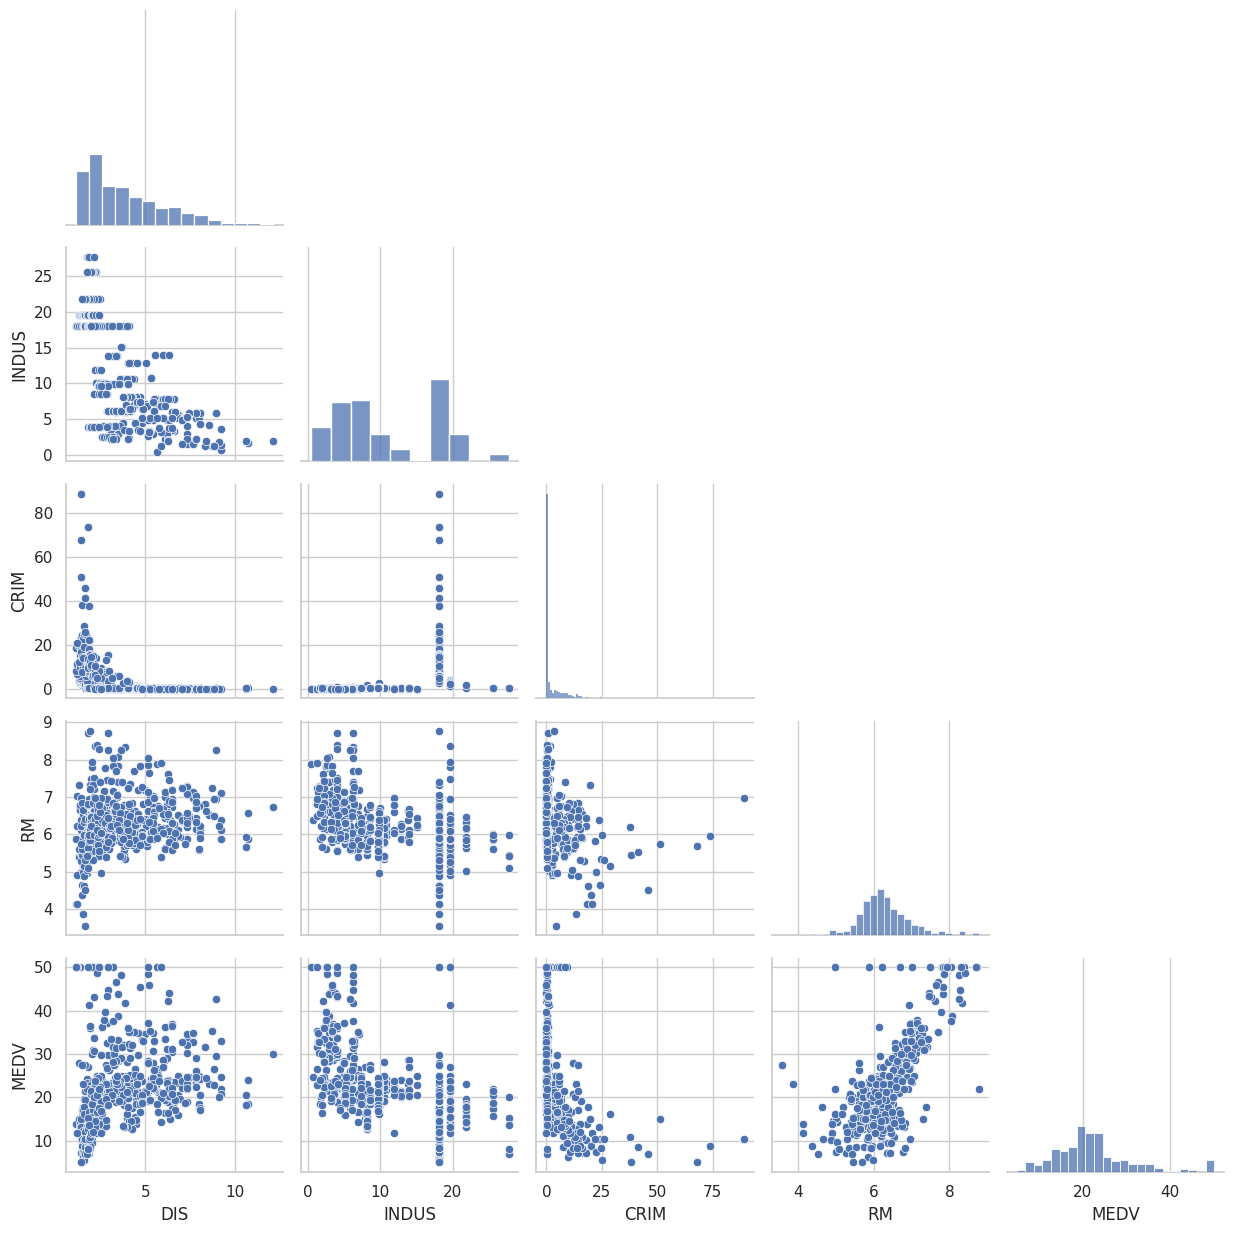

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dar estilos predefinidos
sns.set_theme(style='whitegrid', context='notebook', palette='deep')

# Escoger 5 variables importantes para hacer relaciones entre ellas y como se distribuyen entre ellas
cols = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']

# Hacer el primer grafico
sns.pairplot(df[cols], height=2.5, corner=True)


plt.tight_layout()
plt.show()

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

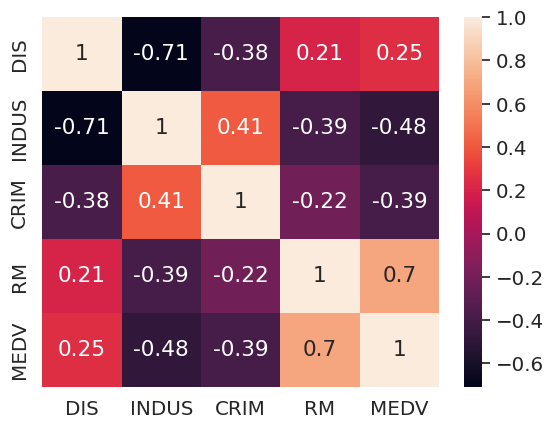

In [5]:
# cm = np.corrcoef(house_df[cols].values.T)
sns.set(font_scale=1.3)
sns.heatmap(df[cols].corr(), cbar=True, annot=True, yticklabels=cols, xticklabels=cols);

## Creando modelo con sklearn -> Regresion Lineal Multivariable

In [22]:
# Escalamiento de los datos -> ajustando el modelo
from sklearn.preprocessing import StandardScaler
# importar el modelo de regresion lineal
from sklearn.linear_model import LinearRegression

# Definir las variables dependientes y independientes
X = df[['RM', 'INDUS']].values # Variables independientes
y = df['MEDV'].values.reshape(-1, 1) # Variable dependiente

# Instanciamos el modelo de escalamiento de los datos
sc_x = StandardScaler()
sc_y = StandardScaler()


# Ajustar los datos estandarizados z = (x - u) / std
X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(y)


slr = LinearRegression()
# Entrenar el modelo con los datos estandarizado
slr.fit(X_std, Y_std)

LinearRegression()

## Análisis de resultados

/home/mike/regresion_lineal/.venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


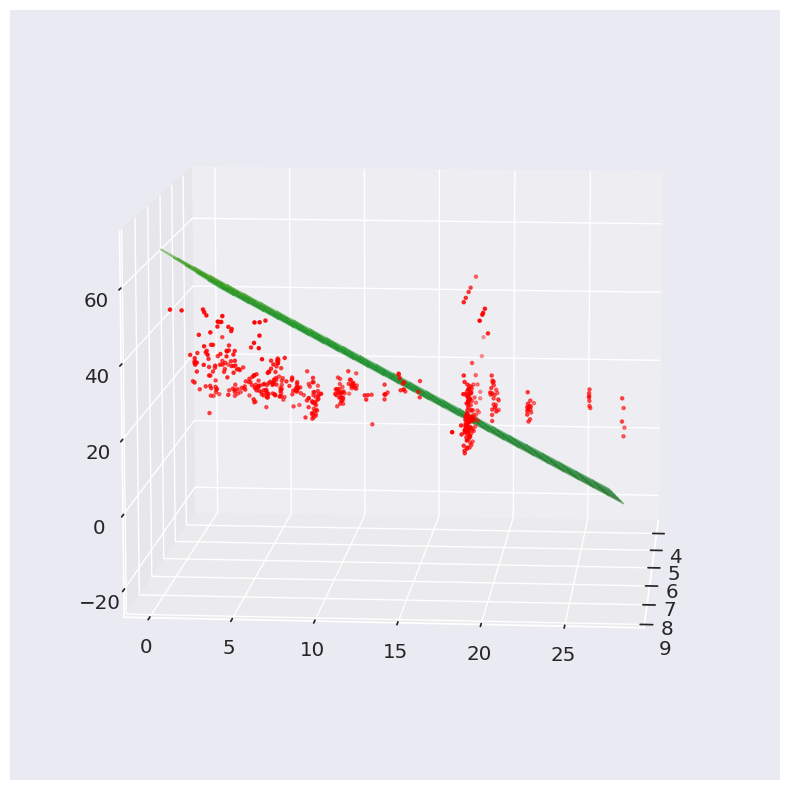

In [53]:
# Herramientas para graficas en 3D
from mpl_toolkits.mplot3d import *
import numpy as np


# Definir el rango de valores para la variable predictiva 'RM'
x1_range = np.arange(df['RM'].min(), df['RM'].max())
# Definir el rango de valores para la variable predictiva 'INDUS'
x2_range = np.arange(df['INDUS'].min(), df['INDUS'].max())

# # crear una malla de puntos que cubra los rangos de valores de ambas variables predictoras
X1, X2 = np.meshgrid(x1_range, x2_range)

# crear un dataframe con todas las combinaciones posibles de valores de ambas variables predictoras
plano = pd.DataFrame({'RM': X1.ravel(), 'INDUS': X2.ravel()})

# utilizar los coeficientes y la intercepción del modelo de regresión lineal múltiple ajustado para hacer predicciones en el plano creado
pred = slr.predict(plano).reshape(X1.shape)

#  escalar las predicciones inversamente utilizando el objeto sc_y para obtener los valores reales de la variable de respuesta "MEDV"
pred = sc_y.inverse_transform(pred)

# Graficar la prediccion en 3D
fig = plt.figure(figsize=(10, 10))
# Grafica en 3 Dimensiones
ax = fig.add_subplot(111, projection='3d')
# Graficar una superficie
ax.plot_surface(X1, X2, pred, alpha=0.4, color='green', cmap='viridis')

ax.scatter(df['RM'], df['INDUS'], df['MEDV'], c='red', marker='.')

ax.view_init(elev=10, azim=5)

plt.show()
